#Bibliotecas:

In [2]:
# Tratamento dos dados
import numpy as np
import pandas as pd
import joblib

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Import RandomForestClassifier and GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

#Importando dados

In [3]:
# Recebendo os dados:
data_google_id = '1DzIdRKkXoQTWgGbNCemjiGRSWtmkUyJy'
gdd(file_id=data_google_id,
    dest_path = './dados_qualidade.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados_qualidade.csv", sep = ',')

288.0 KiB Done.


#Tratando os Dados

In [4]:
dados

,espessura,peso,densidade,umidade,linha,fornecedor,lote,qualidade
0,1.27,511.4,1.12,13.205910,C,local,reciclado,reprovado
1,1.14,514.0,1.10,14.909709,C,importado,reciclado,reprovado
2,1.49,485.4,1.04,2.417731,B,NaN,reciclado,reprovado
3,NaN,498.2,1.18,0.353684,B,local,reciclado,aprovado
4,0.87,517.9,1.10,3.289838,C,importado,reciclado,reprovado
...,...,...,...,...,...,...,...,...
4995,0.81,490.0,0.98,3.659369,C,importado,reciclado,reprovado
4996,0.86,482.7,NaN,1.381720,C,local,reciclado,reprovado
4997,1.23,507.9,1.00,14.408674,B,importado,novo,reprovado
4998,0.94,492.1,1.05,2.532430,NaN,local,reciclado,reprovado


#Retirando os Nulos:

In [5]:
dados.dropna(inplace=True)

In [6]:
dados.isna().sum()

,0
espessura,0
peso,0
densidade,0
umidade,0
linha,0
fornecedor,0
lote,0
qualidade,0


#One label encoding:

In [7]:
dados['qualidade'] = dados['qualidade'].map({'reprovado':0 , 'aprovado': 1})
dados['lote'] = dados['lote'].map({'reciclado':0 , 'novo': 1})
dados['fornecedor'] = dados['fornecedor'].map({'local':0 , 'importado': 1})


In [8]:
dados

,espessura,peso,densidade,umidade,linha,fornecedor,lote,qualidade
0,1.27,511.4,1.12,13.205910,C,0,0,0
1,1.14,514.0,1.10,14.909709,C,1,0,0
4,0.87,517.9,1.10,3.289838,C,1,0,0
6,0.95,484.7,0.96,2.609267,B,1,1,0
7,1.30,500.1,0.99,12.172266,A,1,1,0
...,...,...,...,...,...,...,...,...
4993,0.98,519.8,1.18,6.510440,C,1,0,0
4994,1.13,510.9,1.08,0.639704,A,0,1,0
4995,0.81,490.0,0.98,3.659369,C,1,0,0
4997,1.23,507.9,1.00,14.408674,B,1,1,0


#One Hot encoding

In [9]:
linhas = pd.get_dummies(dados["linha"], prefix = "linha")

In [10]:
linhas

,linha_A,linha_B,linha_C
0,False,False,True
1,False,False,True
4,False,False,True
6,False,True,False
7,True,False,False
...,...,...,...
4993,False,False,True
4994,True,False,False
4995,False,False,True
4997,False,True,False


In [11]:
dados_corrigidos = pd.concat([dados, linhas], axis=1)

In [12]:
dados_corrigidos.drop(columns=['linha'], inplace=True)

In [13]:
dados_corrigidos

,espessura,peso,densidade,umidade,fornecedor,lote,qualidade,linha_A,linha_B,linha_C
0,1.27,511.4,1.12,13.205910,0,0,0,False,False,True
1,1.14,514.0,1.10,14.909709,1,0,0,False,False,True
4,0.87,517.9,1.10,3.289838,1,0,0,False,False,True
6,0.95,484.7,0.96,2.609267,1,1,0,False,True,False
7,1.30,500.1,0.99,12.172266,1,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
4993,0.98,519.8,1.18,6.510440,1,0,0,False,False,True
4994,1.13,510.9,1.08,0.639704,0,1,0,True,False,False
4995,0.81,490.0,0.98,3.659369,1,0,0,False,False,True
4997,1.23,507.9,1.00,14.408674,1,1,0,False,True,False


#Padronização:
dados em escalas muito diferentes

In [14]:
colunas_numericas = ['espessura','peso','densidade','umidade']
scaler = StandardScaler()
dados_corrigidos[colunas_numericas] = scaler.fit_transform(dados_corrigidos[colunas_numericas])

In [15]:
dados_corrigidos

,espessura,peso,densidade,umidade,fornecedor,lote,qualidade,linha_A,linha_B,linha_C
0,0.592089,0.988369,0.819534,1.327961,0,0,0,False,False,True
1,-0.051188,1.211727,0.589537,1.721314,1,0,0,False,False,True
4,-1.387226,1.546764,0.589537,-0.961342,1,0,0,False,False,True
6,-0.991363,-1.305344,-1.020446,-1.118463,1,1,0,False,True,False
7,0.740538,0.017622,-0.675450,1.089326,1,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
4993,-0.842914,1.709987,1.509527,-0.217808,1,0,0,False,False,True
4994,-0.100671,0.945416,0.359539,-1.573172,0,1,0,True,False,False
4995,-1.684123,-0.850038,-0.790448,-0.876029,1,0,0,False,False,True
4997,0.394158,0.687695,-0.560451,1.605641,1,1,0,False,True,False


In [16]:
X = dados_corrigidos.drop(columns=['qualidade'])
y = dados_corrigidos['qualidade']
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42)

In [17]:
dados_corrigidos.describe()

,espessura,peso,densidade,umidade,fornecedor,lote,qualidade
count,3.337000e+03,3.337000e+03,3.337000e+03,3.337000e+03,3337.000000,3337.000000,3337.00000
mean,5.738426e-16,1.986624e-15,3.465413e-16,1.149814e-16,0.507042,0.501349,0.12766
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,0.500025,0.500073,0.33376
min,-1.733606e+00,-1.709106e+00,-1.710438e+00,-1.719782e+00,0.000000,0.000000,0.00000
25%,-8.923969e-01,-8.500377e-01,-9.054471e-01,-8.714335e-01,0.000000,0.000000,0.00000
50%,-1.705283e-03,-1.674115e-02,-1.004559e-01,6.188863e-03,1.000000,1.000000,0.00000
75%,8.395035e-01,8.680995e-01,9.345328e-01,8.777237e-01,1.000000,1.000000,0.00000
max,1.730195e+00,1.727168e+00,1.739524e+00,1.741549e+00,1.000000,1.000000,1.00000


#Graficos:

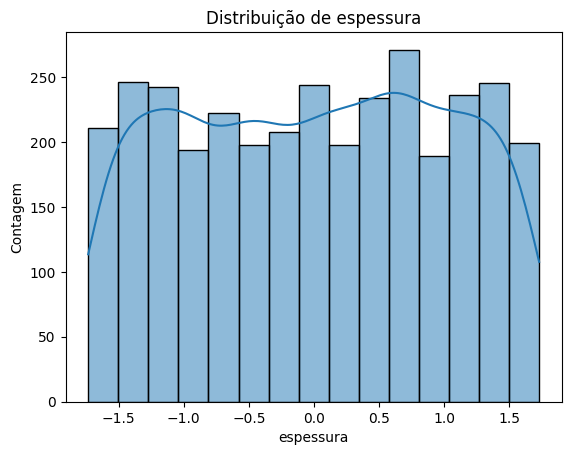

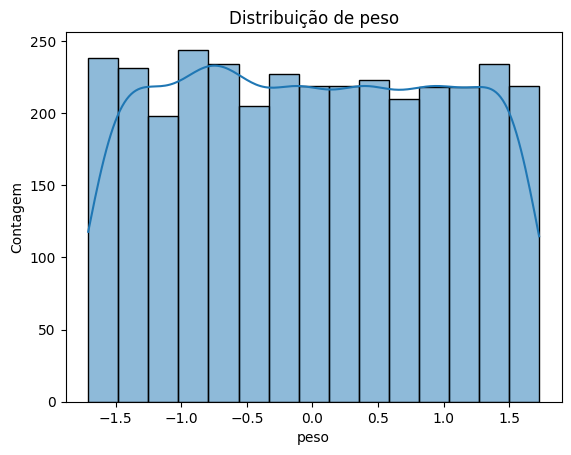

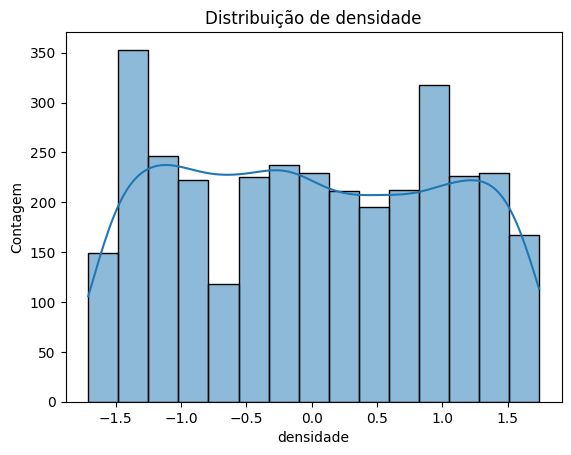

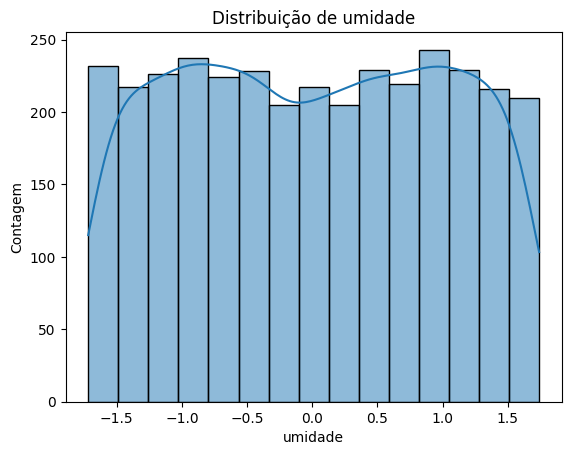

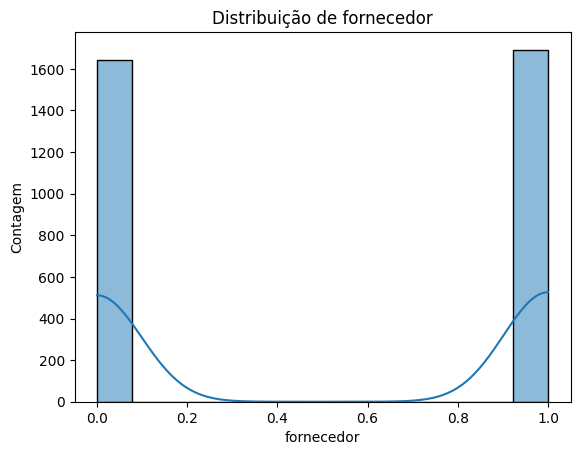

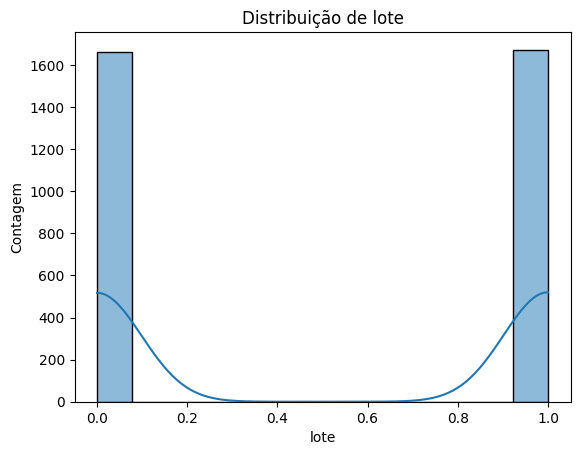

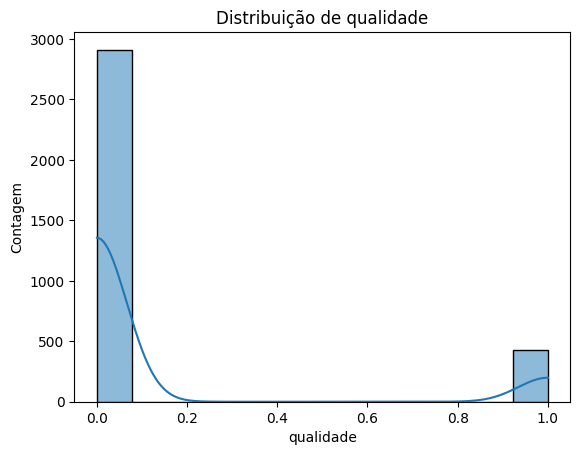

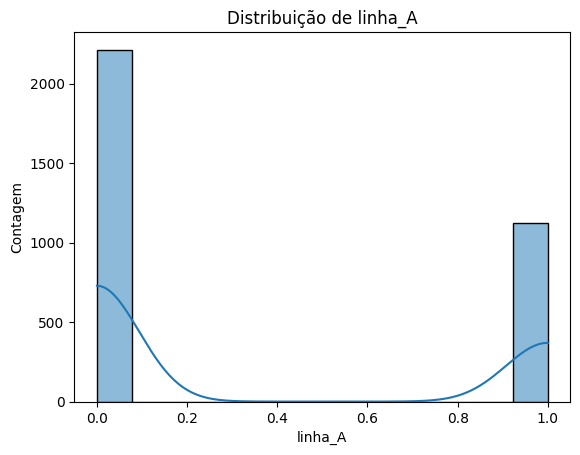

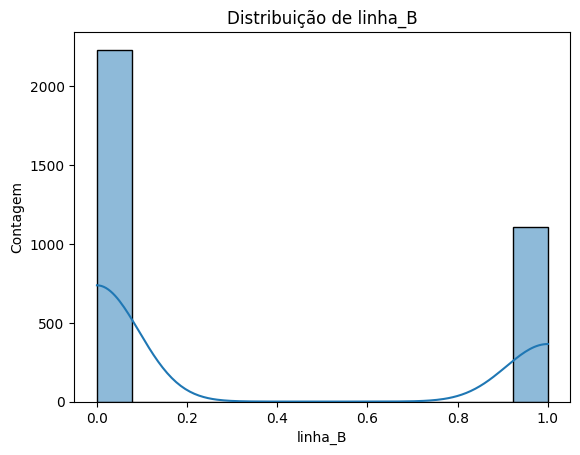

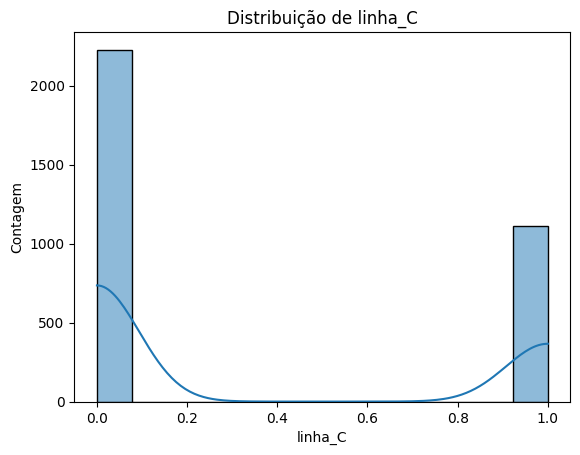

In [18]:
for coluna in dados_corrigidos.columns:
    sns.histplot(x=dados_corrigidos[coluna], kde=True)
    plt.ylabel('Contagem')
    plt.title(f'Distribuição de {coluna}')
    plt.show()

#Modelos de IA


In [19]:
#AUTOMATIZANDO O TREINO
Teste = {'DTC' : DecisionTreeClassifier (criterion='entropy', min_samples_split=4),
         'RFC': RandomForestClassifier(min_samples_split=4, n_estimators=10),
         'GBC': GradientBoostingClassifier( min_samples_split=4, n_estimators=10),
         'GAU': GaussianNB(),
         'QDA': QuadraticDiscriminantAnalysis()}

y_p = {}
for nome, modelo in Teste.items():
  #Treinar o Modelo
  modelo.fit(X_train, y_train)
  y_p[nome] = modelo.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [20]:
#AUTOMATIZANDO O TREINO
Teste = {'DTC' : DecisionTreeClassifier (criterion='entropy', min_samples_split=4),
         'RFC': RandomForestClassifier(min_samples_split=4, n_estimators=10),
         'GBC': GradientBoostingClassifier( min_samples_split=4, n_estimators=10),
         'GAU': GaussianNB(),
         'QDA': QuadraticDiscriminantAnalysis()}

y_p = {}
for nome, modelo in Teste.items():
  #Treinar o Modelo
  modelo.fit(X_train, y_train)
  y_p[nome] = modelo.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Metricas de desempenho

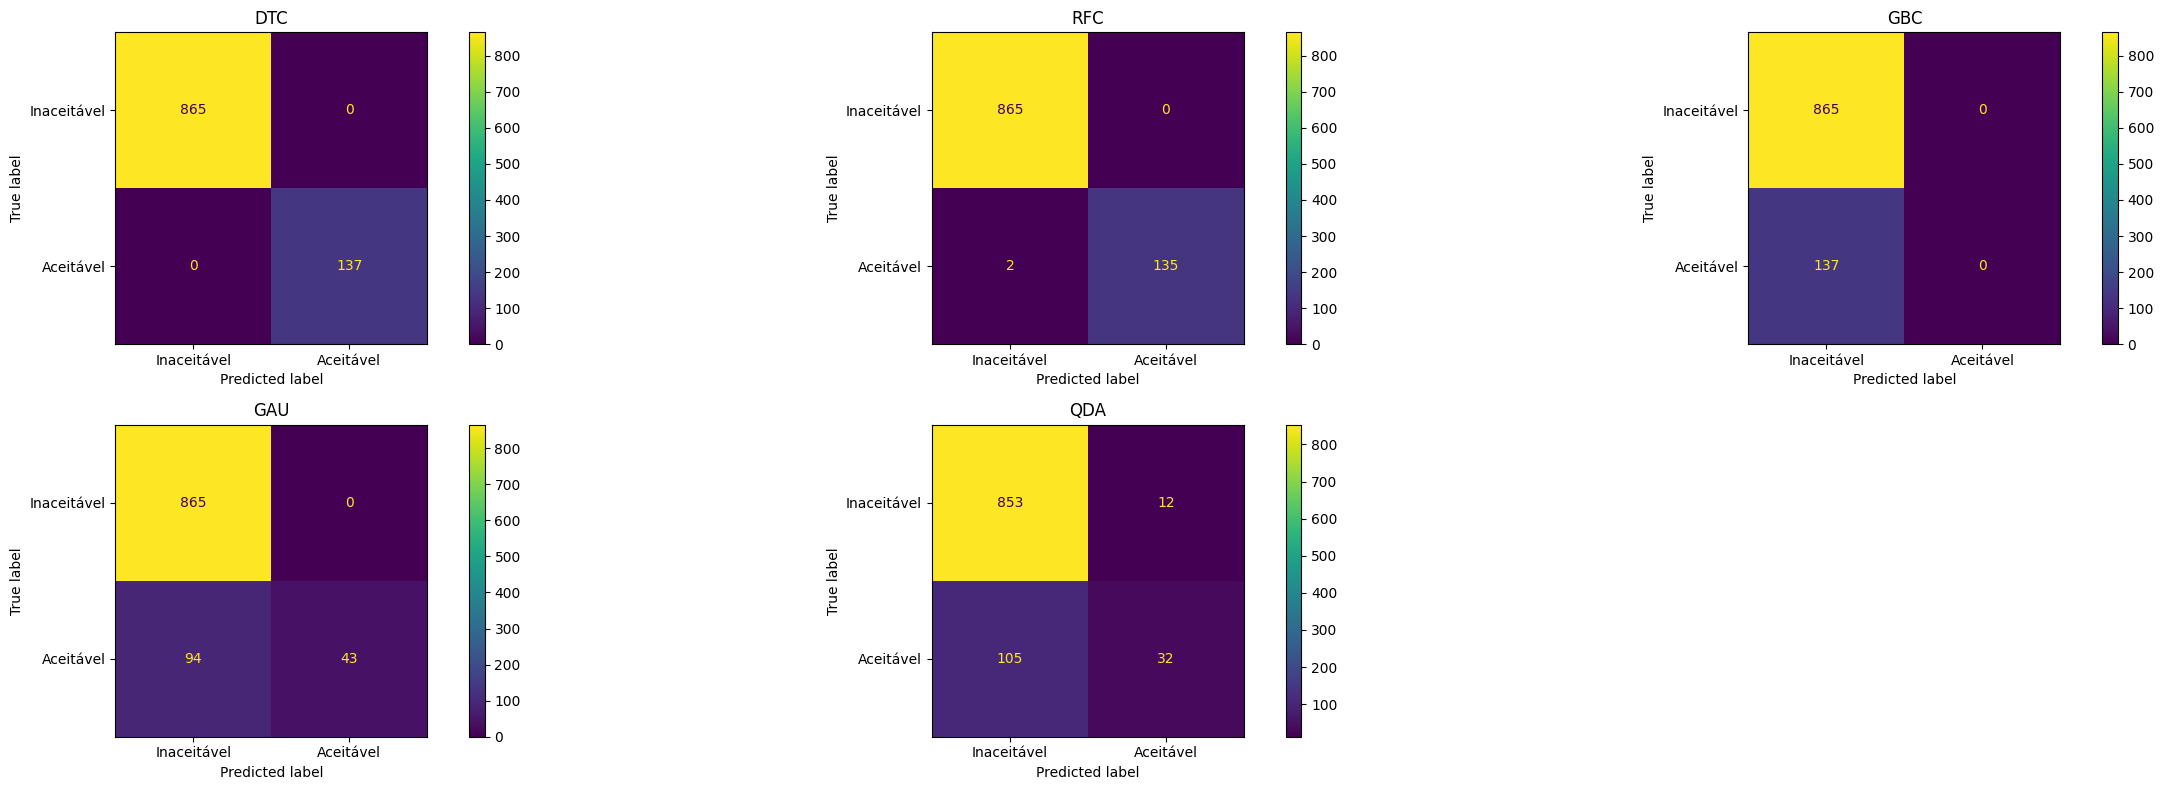

In [21]:

labels_reais = [0, 1]
labels_display = ['Inaceitável', 'Aceitável']

# Criar figura
figure = plt.figure(figsize=(25,8))

for i, (nome_modelo, y_p_values) in enumerate(y_p.items()):
    # Criar matriz de confusão
    cm = confusion_matrix(y_true=y_test, y_pred=y_p_values, labels=labels_reais)

    # Display da matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_display)


    ax = plt.subplot(2,3,i+1)
    disp.plot(ax=ax, colorbar=True)
    ax.set_title(nome_modelo)

plt.tight_layout()
plt.show()

#Precisão das IAs

In [22]:
for nome_modelo, y_p in y_p.items():
  print(f"{nome_modelo}:")
  print(classification_report(y_true=y_test, y_pred=y_p))
  print('='*53)

DTC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00       137

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

RFC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      0.99      0.99       137

    accuracy                           1.00      1002
   macro avg       1.00      0.99      1.00      1002
weighted avg       1.00      1.00      1.00      1002

GBC:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       865
           1       0.00      0.00      0.00       137

    accuracy                           0.86      1002
   macro avg       0.43      0.50      0.46      1002
weighted avg       0.75      0.86      0.80      1002

GAU:

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Obtendo a curva ROC

In [23]:
# Calculando o ROC para cada modelo
roc_auc_scores = {}
for nome, modelo in Teste.items():
  # Para ROC, precisamos das probabilidades
  if hasattr(modelo, "predict_proba"):
    y_prob = modelo.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores[nome] = roc_auc
  else:
    roc_auc_scores[nome] = "N/A (modelo não suporta predict_proba)"

print("ROC-AUC Scores:")
for nome, score in roc_auc_scores.items():
  print(f"{nome}: {score}")

ROC-AUC Scores:
DTC: 1.0
RFC: 0.9998860807560862
GBC: 0.9999915615374879
GAU: 0.9797814438209358
QDA: 0.9238766296780727


#Criando graficos para curva ROC:

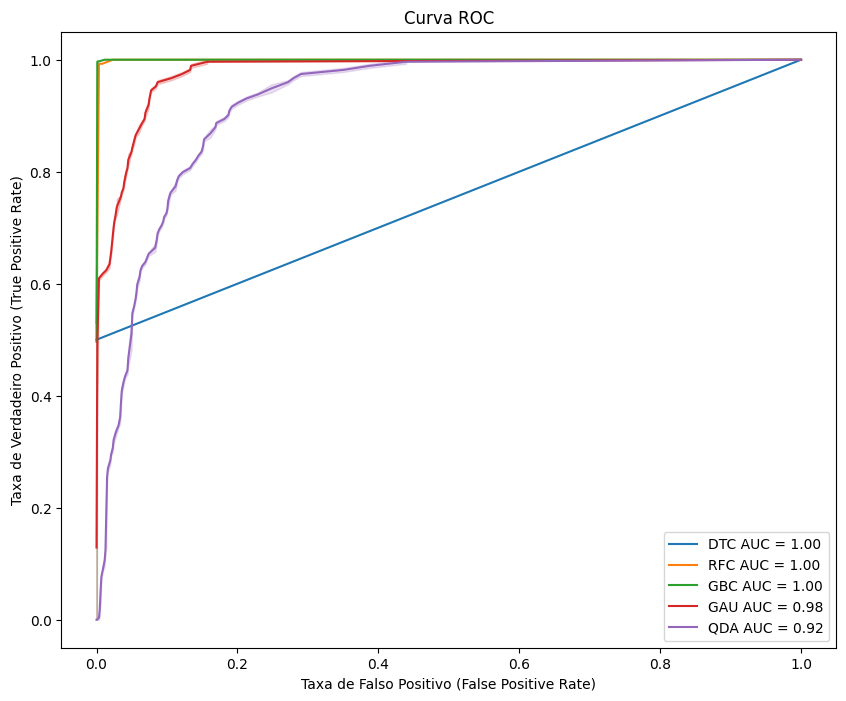

In [24]:
plt.figure(figsize=(10, 8))

for nome, modelo in Teste.items():
  if hasattr(modelo, "predict_proba"):
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    sns.lineplot(x=fpr, y=tpr, label= f"{nome} AUC = {roc_auc_scores[nome]:.2f}")
  else:
    print(f"Modelo {nome} não suporta predict_proba, pulando plotagem da curva ROC.")

plt.xlabel('Taxa de Falso Positivo (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#Conclusao

O melhor modelo foi o DTC(decision tree classifier) com a media de 100% de precisão. nesse caso falsos positivos seriam mais prejudiciais, pois um modelo que normalmente ser reprovado afetaria muito mais do que um o prejuizo de um aprovado ser tratado como um reprovado. isso ajudaria a empresa em padronizar seus processos e fazer estudos em que tipos de metricas seria mais produtivo realizar a produção




In [25]:
# Melhor Modelo foi o DTC
melhor_apli= Teste['DTC']

# Salvar o pré-processamento (StandardScaler) e o modelo
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(melhor_apli, 'melhor_apli.pkl')

print("Modelo Salvo!")

Modelo Salvo!


In [26]:
def previsao_usuario():
    # Carregar scaler e modelo
    with open('scaler.pkl', 'rb') as f:
        scaler_carregado = joblib.load(f)
    with open('melhor_apli.pkl', 'rb') as f:
        modelo_carregado = joblib.load(f)

    # Receber inputs do usuário
    print("Digite os valores :")
    espessura = float(input("espessura: "))
    peso= float(input("peso: "))
    umidade = float(input("umidade: "))
    densidade = float(input("densidade: "))
    fornecedor = int(input("fornecedor (0 ou 1): "))
    lote= int(input("lote (0 ou 1): "))
    qualidade = int(input("qualidade (0 ou 1): "))
    Linha_A= bool(input("Linha_A (0 ou 1): "))
    Linha_B = bool(input("Linha_B (0 ou 1): "))
    Linha_C= bool(input("Linha_C (0 ou 1): "))

    # Dados de entrada
    X_novo = np.array([[espessura, peso, umidade,
                        densidade, fornecedor, lote, qualidade, Linha_A,	Linha_B,	Linha_C]])

    # Padronizar
    X_novo_pad = scaler_carregado.transform(X_novo)

    # Prever
    pred = modelo_carregado.predict(X_novo_pad)


    print(f"\nPredição do modelo: {pred[0]}")


In [27]:
previsao_usuario()

Digite os valores :


KeyboardInterrupt: Interrupted by user